# Projet Machine Learning


### Le probléme : 
  
 
 

Parmi les 25 000 observations au total, 5 529 observations
(22,12 %) sont les titulaires de la carte avec défaut de paiement. Cette
la recherche a utilisé une variable binaire - paiement par défaut
(Oui = 1, Non = 0),

### La description des Variables : 
 


X1 : Montant du crédit accordé (dollar NT) : il comprend
à la fois le crédit à la consommation individuel et sa famille
crédit (supplémentaire).

X2 : Sexe (1 = homme ; 2 = femme).

X3 : Éducation (1 = études supérieures ; 2 = université ;
3 = lycée ; 4 = autres).

X4 : Etat civil (1 = marié ; 2 = célibataire ; 3 = autres).

X5 : Âge (année).

X6–X11 : Historique des paiements passés. Nous avons suivi le passé
relevés de mensualité (d'avril à septembre,2005) comme suit : X6 = l'état du remboursement en septembre 2005 ; X7 = le statut de remboursement en août 2005;...;X11 = l'état du remboursement en avril 2005.

L'échelle de mesure de l'état de remboursement est :
-1 = payer en bonne et due forme 
 1 = retard de paiement d'un mois ;
 2 = retard de paiement de deux mois ; ... ; 
 8 = paiement retard de huit mois
 9 = délai de paiement pour neuf mois et plus.

X12–X17 : montant de la facture (dollar NT).

X12 = montant du relevé de facture en septembre 2005 ;

X13 = montant du relevé de facture en août 2005;...;X17 = montant du relevé de facture en avril 2005.

X18–X23 : montant du paiement précédent (dollar NT).

X18 = montant payé en septembre 2005 ; 

X19 = montant payé en août 2005...;

X23 = montant payé en avril 2005
 

In [ ]:
# Importation des Bibliothéques 
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
from numpy import isnan
from pandas import read_csv

In [ ]:
# Importation du DataFrame 
df= pd.read_excel ('default of credit card clients.xls',skiprows=1)

##  Data understanding

#### Déterminer précisément les données à analyser, à identifier la qualité des données disponibles. 

In [ ]:
#Cette méthode retourne des informations sur une DataFrame 
#(dtypes d'index et de colonne, les valeurs non nulles et l'utilisation de la mémoire)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [ ]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [ ]:
df.isnull().sum().sum()

0

# Interprétation 
Notre DataFrame ne contient pas des valeurs nulles donc on peut continuer a l'étudier 


In [ ]:
# afficher les premières lignes du jeu de données
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
#Charger un résumé des diffrentes variables dans notre "DataFrame"
profile = ProfileReport(df, title='Pandas Profiling Report', html={'style':{'full_width':True}})
profile

#identification des valeurs nulles
df.isnull().values.any()

#verifier encore si il ya des valeurs nulles
df.isnull()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# dimensions : nombre de lignes et nombre de colonnes
df.shape

(30000, 25)

In [ ]:
#Affiche les variables 
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [ ]:
# Description de Notre DataFrame 
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


### Description Graphique de notre DataFrame 


In [ ]:
%matplotlib inline
# importation de librairie
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.patches as mpatches

array([[<AxesSubplot:title={'center':'AGE'}>]], dtype=object)

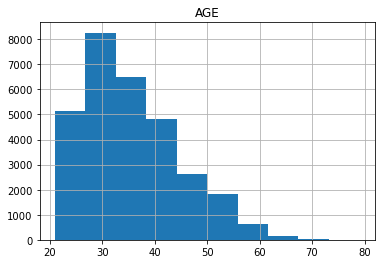

In [ ]:
# histogramme de l'âge
df.hist(column='AGE')

<AxesSubplot:ylabel='Density'>

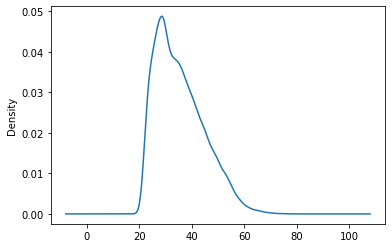

In [ ]:
# density plot
# kernel density estimation
df['AGE'].plot.kde()

#### III. Data preparation 

Organiser les données pour la modélisation


# Feature Selection


In [ ]:
#suppression de la Colonne ID:colonne qui n'a pas d'influence su la valeur cible
df.drop('ID',
  axis='columns', inplace=True)

In [ ]:
df.shape

(30000, 24)

In [ ]:
array = df.values
X1=df.drop("default payment next month",axis=1)
Y1=df["default payment next month"]

In [ ]:
X1

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,3502,8979,5190,0,1837,3526,8998,129,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,2758,20878,20582,19357,0,0,22000,4200,2000,3100
29998,80000,1,3,1,41,1,-1,0,0,0,...,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804


In [ ]:
Y1

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default payment next month, Length: 30000, dtype: int64

## Nettoyage des données et suppression des facteurs les moins significatif

#### Methode 1 : Correlation

In [ ]:
cor = df.corr()
#Correlation with output variable
cor_target = abs(cor["default payment next month"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.00]
relevant_features

LIMIT_BAL                     0.153520
SEX                           0.039961
EDUCATION                     0.028006
MARRIAGE                      0.024339
AGE                           0.013890
PAY_0                         0.324794
PAY_2                         0.263551
PAY_3                         0.235253
PAY_4                         0.216614
PAY_5                         0.204149
PAY_6                         0.186866
BILL_AMT1                     0.019644
BILL_AMT2                     0.014193
BILL_AMT3                     0.014076
BILL_AMT4                     0.010156
BILL_AMT5                     0.006760
BILL_AMT6                     0.005372
PAY_AMT1                      0.072929
PAY_AMT2                      0.058579
PAY_AMT3                      0.056250
PAY_AMT4                      0.056827
PAY_AMT5                      0.055124
PAY_AMT6                      0.053183
default payment next month    1.000000
Name: default payment next month, dtype: float64

## Visualisation

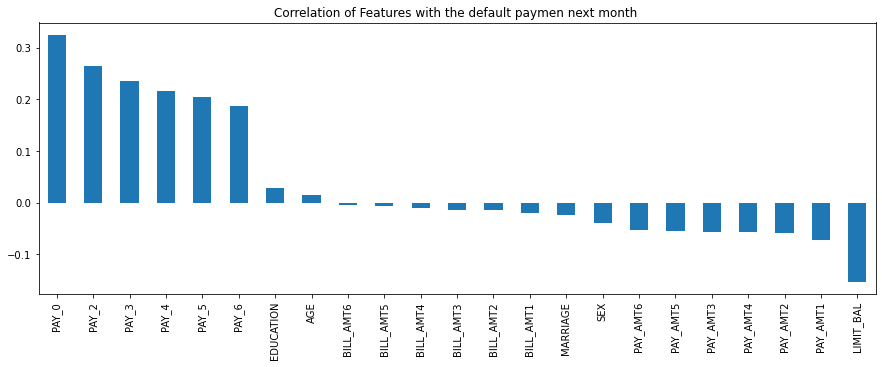

In [ ]:
plt.figure(figsize=(15,5))
plt.title("Correlation of Features with the default paymen next month ")
df.corr()['default payment next month'].drop(index='default payment next month').sort_values(ascending=False).plot(kind='bar')
plt.show()

## Methode 2 : ANOVA

In [ ]:
from sklearn.feature_selection import f_classif

In [ ]:
# since f_class_if does not accept missing values, we will do a very crude imputation of missing values
#X_train_num.fillna(X_train_num.mean(), inplace = True)
# Calculate F Statistic and corresponding p values
F_statistic, p_values = f_classif(X1,Y1)
# convert to a DF
ANOVA_F_table = pd.DataFrame(data = {'Numerical_Feature': X1.columns.values, 'F-Score': F_statistic, 'p values': p_values.round(decimals=10)})
ANOVA_F_table.sort_values(by = ['F-Score'], ascending = False, ignore_index = True, inplace = True)
ANOVA_F_table

,Numerical_Feature,F-Score,p values
0,PAY_0,3537.714970,0.000000
1,PAY_2,2239.169136,0.000000
2,PAY_3,1757.466444,0.000000
3,PAY_4,1476.845967,0.000000
4,PAY_5,1304.591176,0.000000
5,PAY_6,1085.402485,0.000000
6,LIMIT_BAL,724.068539,0.000000
7,PAY_AMT1,160.403810,0.000000
8,PAY_AMT2,103.291524,0.000000
9,PAY_AMT4,97.188000,0.000000


In [ ]:
feature_names = list(df.columns.values)
feature_names

['LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

### Suppression de feature le moins significatif 

In [ ]:
df.drop('BILL_AMT6',
  axis='columns', inplace=True)

In [ ]:
feature_names = list(df.columns.values)
feature_names

['LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

In [ ]:
df.shape

(30000, 23)

## Suppression des valeurs aberrantes 

In [ ]:
def plot_boxplot(df, ft):
    df.boxplot(column=[ft])
    plt.grid(False)
    plt.show()

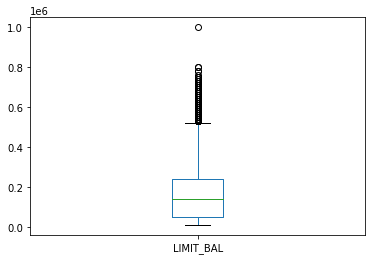

In [ ]:
plot_boxplot(df,"LIMIT_BAL")

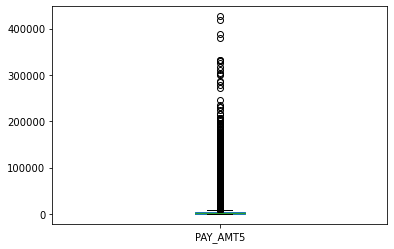

In [ ]:
plot_boxplot(df,"PAY_AMT5")

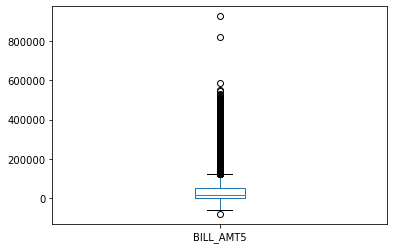

In [ ]:
plot_boxplot(df,"BILL_AMT5")

# Supprimer des valeurs aberrantes 

In [ ]:
def outliers(df,ft):
    Q1=df[ft].quantile(0.25)
    Q3=df[ft].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR


    ls = df.index[  (df[ft] < lower_bound) | (df[ft] > upper_bound ) ]

    return ls

In [ ]:
index_list= []
for feature in [ 'LIMIT_BAL' , 'PAY_AMT5' , 'BILL_AMT5']:
    index_list.extend(outliers(df,feature))

In [ ]:
def remove(df, ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

In [ ]:
df_cleaned = remove(df, index_list)

In [ ]:
df_cleaned.shape

(24979, 23)

In [ ]:
array = df_cleaned.values
X1=df_cleaned.drop("default payment next month",axis=1)
Y1=df_cleaned["default payment next month"]

In [ ]:
X1

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,...,3102,689,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,1725,2682,3272,3455,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,14027,13559,14331,14948,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,48233,49291,28314,28959,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,5670,35835,20940,19146,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29994,80000,1,2,2,34,2,2,2,2,2,...,77708,79384,77519,82607,7000,3500,0,7000,0,4000
29995,220000,1,3,1,39,0,0,0,0,0,...,192815,208365,88004,31237,8500,20000,5003,3047,5000,1000
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,1828,3502,8979,5190,1837,3526,8998,129,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,3356,2758,20878,20582,0,0,22000,4200,2000,3100


## Modeling 



In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#Split X and y into training and test set in 70,30 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, Y1,test_size=0.3, random_state=0)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

## Logistic Regression

In [ ]:
ns_probs = [0 for _ in range(len(y_test))]
# fit a model
LRmodel = LogisticRegression()
LRmodel.fit(X_train, y_train)
# predict probabilities
lr_probs = LRmodel.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)


C:\Users\miral\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
l_scores = cross_val_score(LRmodel, X_train, y_train)
l_scores
y_predLR=LRmodel.predict(X_test)

C:\Users\miral\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\miral\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

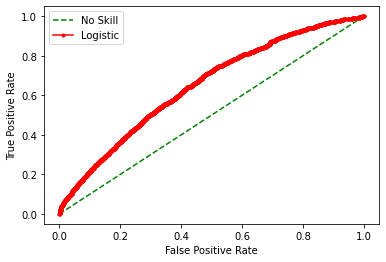

In [ ]:
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, color= "green", linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr,color="red", marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
s1=np.average(l_scores)

In [ ]:
error_rate_LR= 1- s1


In [ ]:
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
print('Score:',s1)
print('Error rate:',error_rate_LR)

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.651
Score: 0.7648269945667716
Error rate: 0.2351730054332284


## Decision Tree

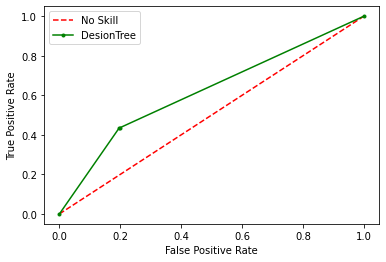

In [ ]:
ns_probs = [0 for _ in range(len(y_test))]
# fit a model
DTmodel = DecisionTreeClassifier()
DTmodel.fit(X_train, y_train)
# predict probabilities
DT_probs = DTmodel.predict_proba(X_test)
# keep probabilities for the positive outcome only
DT_probs = DT_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
DT_auc = roc_auc_score(y_test, DT_probs)
# summarize scores

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
DT_fpr, DT_tpr, _ = roc_curve(y_test, DT_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, color="red" ,linestyle='--', label='No Skill')
pyplot.plot(DT_fpr, DT_tpr, color="green", marker='.', label='DesionTree')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
y_predDT=DTmodel.predict(X_test)

In [ ]:
d_scores = cross_val_score(DecisionTreeClassifier(), X_train, y_train)
d_scores

array([0.72233343, 0.70174435, 0.70546182, 0.71432657, 0.70860738])

In [ ]:
sd=np.average(d_scores)

In [ ]:
error_rate_DT=1-sd

In [ ]:
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('DecisionTree: ROC AUC=%.3f' % (DT_auc))
print('Scores: ',d_scores)
print('Error Rate:',error_rate_DT)

No Skill: ROC AUC=0.500
DecisionTree: ROC AUC=0.619
Scores:  [0.72233343 0.70174435 0.70546182 0.71432657 0.70860738]
Error Rate: 0.2895052902487848


## SVM

In [ ]:
s_scores = cross_val_score(SVC(), X_train, y_train)
SVMmodel=SVC()
SVMmodel.fit(X_train, y_train)
y_predSVM=SVMmodel.predict(X_test)

In [ ]:
s2=np.average(s_scores)


In [ ]:
error_rate_SVM=1-s2

In [ ]:
print('Scores: ',s_scores)
print('Error Rate: ',error_rate_SVM)

Scores:  [0.76494138 0.76494138 0.76494138 0.76494138 0.76465542]
Error Rate:  0.2351158135544752


## Neighbor K-nearest classifiers (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

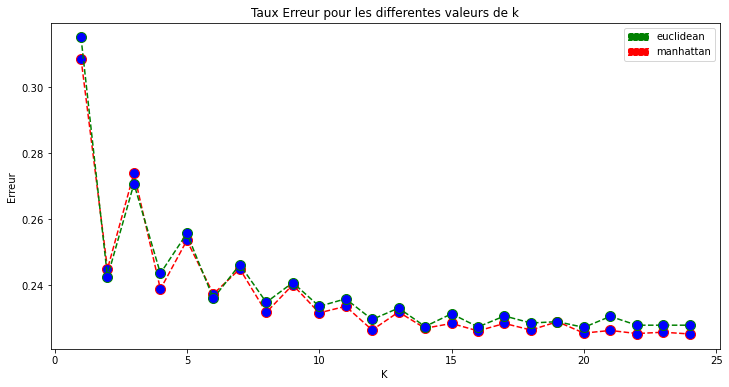

In [ ]:
error = []
error1 = []
# Calculer l'erreur pour k entre 1 et 25 
#Pour chaque itération, l'erreur moyenne pour les valeurs prédites 
#de l'ensemble de test est calculée et sauvegardée ds la liste Erreur.
# Tester k de 1 à 25 et la distance Manhattan ,euclidean
for i in range(1, 25):
    knn = KNeighborsClassifier(i,metric='manhattan')
    knn_model = knn.fit(X_train, y_train)
    pred_i = knn_model.predict(X_test)
    error.append(np.mean(pred_i != y_test))
     
    knn1 = KNeighborsClassifier(i,metric='euclidean')
    knn_model1 = knn1.fit(X_train, y_train)
    pred_i1 = knn_model1.predict(X_test)
    error1.append(np.mean(pred_i1 != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 25), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.plot(range(1, 25), error1, color='green', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)

red_patch = mpatches.Patch(color='red',linestyle='dashed',label='manhattan')
green_patch = mpatches.Patch(color='green',linestyle='dashed', label='euclidean')

plt.legend(handles=[green_patch,red_patch])

plt.title('Taux Erreur pour les differentes valeurs de k')
plt.xlabel('K ')
plt.ylabel('Erreur')
plt.savefig('figureEreur.png', dpi = 400)


In [ ]:
print(min(error))
print(min(error1))
print(error.index(min(error)))
print(error)

0.2251134240725914
0.22711502535361622
23
[0.3087803576194289, 0.2448625567120363, 0.27395249532959703, 0.23872431278356018, 0.25353616226314385, 0.23725647184414198, 0.2448625567120363, 0.23165198825727248, 0.24005871363757672, 0.23151854817187084, 0.23352014945289565, 0.2263143848412063, 0.23178542834267413, 0.2268481451828129, 0.2283159861222311, 0.226047504670403, 0.2283159861222311, 0.2263143848412063, 0.22884974646383774, 0.22538030424339472, 0.22618094475580464, 0.22524686415799305, 0.22564718441419804, 0.2251134240725914]


####  Manhattan Distance

In [ ]:
knn = KNeighborsClassifier(23,metric='manhattan')
knn_model = knn.fit(X_train, y_train)
y_predKNN = knn_model.predict(X_test)

In [ ]:
print('Accuracy of K-NN classifier on training set: {:.4f}'
     .format(knn_model.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.4f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.7735
Accuracy of K-NN classifier on test set: 0.7744


In [ ]:
knn_scores=knn.score(X_test, y_test)
s4=np.average(knn_scores)
error_rate_KNN=1-s4

In [ ]:
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('KNeighborsClassifier: ROC AUC=%.3f' % (KNN_auc))
print('Scores: ',knn_scores)
print('Error Rate: ',error_rate_KNN)

No Skill: ROC AUC=0.500
KNeighborsClassifier: ROC AUC=0.647
Scores:  0.7743528155858019
Error Rate:  0.22564718441419807


#### Euclidean Distance

In [ ]:
knn = KNeighborsClassifier(23,metric='euclidean')
knn_model = knn.fit(X_train, y_train)


In [ ]:
print('Accuracy of K-NN classifier on training set: {:.4f}'
     .format(knn_model.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.4f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.7738
Accuracy of K-NN classifier on test set: 0.7722


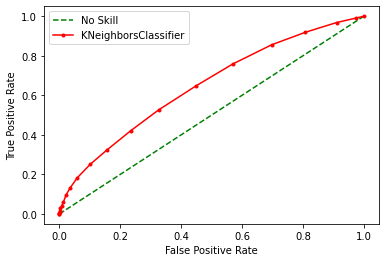

In [ ]:
ns_probs = [0 for _ in range(len(y_test))]
# fit a model
#KNNmodel =KNeighborsClassifier()
#KNNmodel.fit(X_train, y_train)
# predict probabilities
KNN_probs = knn_model.predict_proba(X_test) #choix du model:le modele du manhattan car son accuracy est plus élevée que celle du Euclidian
# keep probabilities for the positive outcome only
KNN_probs = KNN_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
KNN_auc = roc_auc_score(y_test, KNN_probs)
# summarize scores

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
KNN_fpr, KNN_tpr, _ = roc_curve(y_test, KNN_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, color= "green", linestyle='--', label='No Skill')
pyplot.plot(KNN_fpr, KNN_tpr,color="red", marker='.', label='KNeighborsClassifier')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## Naïve Bayesian classifier (NB)

In [ ]:
from sklearn.naive_bayes import GaussianNB


# instantiate the model
gnb = GaussianNB()


# fit the model
gnb.fit(X_train, y_train)

GaussianNB()

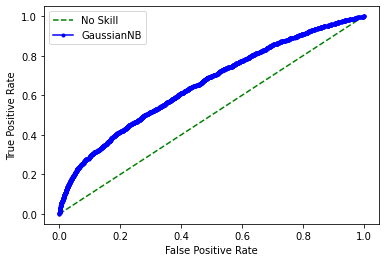

In [ ]:
ns_probs = [0 for _ in range(len(y_test))]
# fit a model
NBmodel =GaussianNB()
NBmodel.fit(X_train, y_train)
# predict probabilities
NB_probs = NBmodel.predict_proba(X_test)
# keep probabilities for the positive outcome only
NB_probs = NB_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
NB_auc = roc_auc_score(y_test, NB_probs)
# summarize scores

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
NB_fpr, NB_tpr, _ = roc_curve(y_test, NB_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, color= "green", linestyle='--', label='No Skill')
pyplot.plot(NB_fpr, NB_tpr,color="blue", marker='.', label='GaussianNB')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
y_pred = gnb.predict(X_test)
y_predNB=NBmodel.predict(y_train)

In [ ]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_predNB)))


Model accuracy score: 0.4167


In [ ]:
s5=accuracy_score(y_train, y_predNB)
error_rate_NB=1-s5
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('GaussianNB: ROC AUC=%.3f' % (NB_auc))
print('Accuracy_score: ',s5)
print('Error Rate: ',error_rate_NB)

No Skill: ROC AUC=0.500
GaussianNB: ROC AUC=0.657
Accuracy_score:  0.4167333867093675
Error Rate:  0.5832666132906326


## Classification trees (CTs)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
param_grid = {'criterion': ['gini', 'entropy'],
             'max_depth': np.arange(1,10)}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid=param_grid, cv=5)

In [ ]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [ ]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 3}

In [ ]:
final_model = DecisionTreeClassifier(random_state=1, criterion='gini', max_depth=3)

In [ ]:
final_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

No Skill: ROC AUC=0.500
DecisionTreeClassifier: ROC AUC=0.732


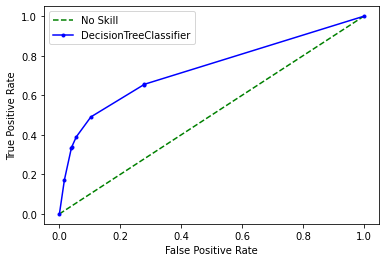

In [ ]:
ns_probs = [0 for _ in range(len(y_test))]
# fit a model
#model =DecisionTreeClassifier()
#CTmodel.fit(X_train, y_train)
# predict probabilities
CT_probs = final_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
CT_probs = CT_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
CT_auc = roc_auc_score(y_test, CT_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('DecisionTreeClassifier: ROC AUC=%.3f' % (CT_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
CT_fpr, CT_tpr, _ = roc_curve(y_test, CT_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, color= "green", linestyle='--', label='No Skill')
pyplot.plot(CT_fpr, CT_tpr,color="blue", marker='.', label='DecisionTreeClassifier')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
s5=final_model.score(X_train, y_train)
y_predCT=final_model.predict(X_test)
error_rate_CT=1-s5
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('DecisionTreeClassifier: ROC AUC=%.3f' % (CT_auc))
print('Score: ' ,s5)
print('Error Rate:' ,error_rate_CT)

No Skill: ROC AUC=0.500
DecisionTreeClassifier: ROC AUC=0.732
Score:  0.8089791249642551
Error Rate: 0.19102087503574494


## Artificial neural networks (ANNs)

In [ ]:
import tensorflow as tf

In [ ]:
#pip install tensorflow

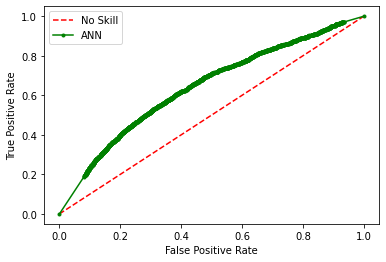

In [ ]:
ns_probs = [0 for _ in range(len(y_test))]
# fit a model
ANNmodel = MLPClassifier()
ANNmodel.fit(X_train, y_train)
# predict probabilities
ANN_probs = ANNmodel.predict_proba(X_test)
# keep probabilities for the positive outcome only
ANN_probs = ANN_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
ANN_auc = roc_auc_score(y_test, ANN_probs)
# summarize scores

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
ANN_fpr, ANN_tpr, _ = roc_curve(y_test, ANN_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, color="red" ,linestyle='--', label='No Skill')
pyplot.plot(ANN_fpr, ANN_tpr, color="green", marker='.', label='ANN')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
#Initialising ANN
ann = tf.keras.models.Sequential()

In [ ]:
#Adding First Hidden Layer
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))

In [ ]:
 #Adding Second Hidden Layer
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))

In [ ]:
#Adding Output Layer
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

In [ ]:
#Compiling ANN
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [ ]:
#Fitting ANN
modelANN=ann.fit(X_train,y_train,batch_size=32,epochs = 100)

Epoch 1/100
547/547 [==============================] - 1s 590us/step - loss: 323.4212 - accuracy: 0.6893
Epoch 2/100
547/547 [==============================] - 0s 608us/step - loss: 18.6680 - accuracy: 0.7545
Epoch 3/100
547/547 [==============================] - 0s 756us/step - loss: 3.8527 - accuracy: 0.7641
Epoch 4/100
547/547 [==============================] - 0s 616us/step - loss: 1.9443 - accuracy: 0.7649
Epoch 5/100
547/547 [==============================] - 0s 601us/step - loss: 1.2285 - accuracy: 0.7650
Epoch 6/100
547/547 [==============================] - 0s 627us/step - loss: 0.8405 - accuracy: 0.7649
Epoch 7/100
547/547 [==============================] - 0s 634us/step - loss: 0.6551 - accuracy: 0.7650
Epoch 8/100
547/547 [==============================] - 0s 641us/step - loss: 0.6270 - accuracy: 0.7650
Epoch 9/100
547/547 [==============================] - 0s 694us/step - loss: 0.6038 - accuracy: 0.7650
Epoch 10/100
547/547 [==============================] - 0s 656us/step 

547/547 [==============================] - 0s 711us/step - loss: 0.5454 - accuracy: 0.7649
Epoch 80/100
547/547 [==============================] - 0s 652us/step - loss: 0.5454 - accuracy: 0.7649
Epoch 81/100
547/547 [==============================] - 0s 628us/step - loss: 0.5454 - accuracy: 0.7649
Epoch 82/100
547/547 [==============================] - 0s 588us/step - loss: 0.5453 - accuracy: 0.7649
Epoch 83/100
547/547 [==============================] - 0s 590us/step - loss: 0.5454 - accuracy: 0.7649
Epoch 84/100
547/547 [==============================] - 0s 628us/step - loss: 0.5454 - accuracy: 0.7649
Epoch 85/100
547/547 [==============================] - 0s 674us/step - loss: 0.5454 - accuracy: 0.7649
Epoch 86/100
547/547 [==============================] - 0s 659us/step - loss: 0.5454 - accuracy: 0.7649
Epoch 87/100
547/547 [==============================] - 0s 592us/step - loss: 0.5454 - accuracy: 0.7649
Epoch 88/100
547/547 [==============================] - 0s 578us/step - loss:

In [ ]:
#s11=model.average(l_scores)
ann_scores=ann.evaluate(X_train,y_train)
y_predANN=ANNmodel.predict(X_test)
s6=np.average(ann_scores)
error_rate_ANN=1-s6
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('ANN: ROC AUC=%.3f' % (CT_auc))
print('Score: ' ,ann_scores)
print('Error Rate:' ,error_rate_ANN)

547/547 [==============================] - 0s 515us/step - loss: 0.5453 - accuracy: 0.7649
No Skill: ROC AUC=0.500
ANN: ROC AUC=0.732
Score:  [0.5453254580497742, 0.7648841738700867]
Error Rate: 0.3448951840400696


## Discriminant Analysis (DA)

In [ ]:

# evaluate a lda model on the dataset
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=10, n_redundant=0, random_state=1)
# define model
DAmodel = LinearDiscriminantAnalysis()
DAmodel.fit(X_train,y_train)
y_predDA=DAmodel.predict(X_test)
# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(DAmodel, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# summarize result
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.797 (0.006)


No Skill: ROC AUC=0.500
DA: ROC AUC=0.726


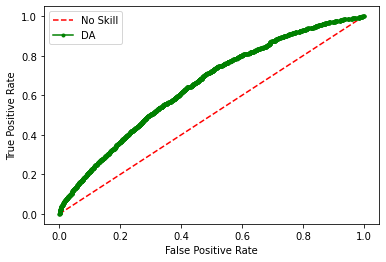

In [ ]:
ns_probs = [0 for _ in range(len(y_test))]
# fit a model
#model = LinearDiscriminantAnalysis()
#model.fit(X_train, y_train)
# predict probabilities
DA_probs = DAmodel.predict_proba(X_test)
# keep probabilities for the positive outcome only
DA_probs = DA_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
DA_auc = roc_auc_score(y_test, DA_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('DA: ROC AUC=%.3f' % (DA_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
DA_fpr, DA_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, color="red" ,linestyle='--', label='No Skill')
pyplot.plot(DA_fpr, DA_tpr, color="green", marker='.', label='DA')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## V. Evaluation
###### Vérifier le(s) modèle(s) ou les connaissances obtenues afin de s’assurer qu’ils répondent aux objectifs formulés au début du processus.

In [ ]:
##les scores
LRscore=accuracy_score(y_test, y_predLR)
DTscore=accuracy_score(y_test, y_predDT)
SVMscore=accuracy_score(y_test, y_predSVM)
RFscore=accuracy_score(y_test, y_predRF)
KNNscore=accuracy_score(y_test, y_predKNN)
NBscore=accuracy_score(y_test, y_predNB)
CTscore=accuracy_score(y_test, y_predCT)
ANNscore=accuracy_score(y_test, y_predANN)
DAscore=accuracy_score(y_test,y_predDA)

In [ ]:
from sklearn.metrics import f1_score, accuracy_score,recall_score, precision_score, classification_report, confusion_matrix
#print ('F1 score:', f1_score(y_test,y_predKNN))
#print ('Recall:', recall_score(y_test,y_hat_test))
#print ('Precision:', precision_score(y_test,y_hat_test))
print ('\n clasification report for Classification Logistic Regression:\n', classification_report(y_test,y_predLR))
print ('\n confussion matrix:\n',confusion_matrix(y_test,y_predLR))


 clasification report for Classification Logistic Regression:
               precision    recall  f1-score   support

           0       0.77      1.00      0.87      5768
           1       1.00      0.00      0.00      1726

    accuracy                           0.77      7494
   macro avg       0.88      0.50      0.44      7494
weighted avg       0.82      0.77      0.67      7494


 confussion matrix:
 [[5768    0]
 [1725    1]]


In [ ]:
print ('\n clasification report for Classification Descision Tree:\n', classification_report(y_test,y_predDT))
print ('\n confussion matrix:\n',confusion_matrix(y_test,y_predDT))


 clasification report for Classification Descision Tree:
               precision    recall  f1-score   support

           0       0.83      0.80      0.81      5768
           1       0.40      0.43      0.42      1726

    accuracy                           0.72      7494
   macro avg       0.61      0.62      0.62      7494
weighted avg       0.73      0.72      0.72      7494


 confussion matrix:
 [[4636 1132]
 [ 976  750]]


In [ ]:
print ('\n clasification report for SVM:\n', classification_report(y_test,y_predSVM))
print ('\n confussion matrix:\n',confusion_matrix(y_test,y_predSVM))


 clasification report for SVM:
               precision    recall  f1-score   support

           0       0.77      1.00      0.87      5768
           1       0.00      0.00      0.00      1726

    accuracy                           0.77      7494
   macro avg       0.38      0.50      0.43      7494
weighted avg       0.59      0.77      0.67      7494


 confussion matrix:
 [[5768    0]
 [1726    0]]


C:\Users\miral\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\miral\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\miral\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print ('\n clasification report for Random Forest:\n', classification_report(y_test,y_predRF))
print ('\n confussion matrix:\n',confusion_matrix(y_test,y_predRF))


 clasification report for Random Forest:
               precision    recall  f1-score   support

           0       0.84      0.94      0.89      5768
           1       0.66      0.39      0.49      1726

    accuracy                           0.81      7494
   macro avg       0.75      0.67      0.69      7494
weighted avg       0.80      0.81      0.79      7494


 confussion matrix:
 [[5410  358]
 [1046  680]]


In [ ]:
print ('\n clasification report for KNN:\n', classification_report(y_test,y_predKNN))
print ('\n confussion matrix:\n',confusion_matrix(y_test,y_predKNN))


 clasification report for KNN:
               precision    recall  f1-score   support

           0       0.79      0.97      0.87      5768
           1       0.55      0.11      0.19      1726

    accuracy                           0.77      7494
   macro avg       0.67      0.54      0.53      7494
weighted avg       0.73      0.77      0.71      7494


 confussion matrix:
 [[5607  161]
 [1530  196]]


In [ ]:
print ('\n clasification report for NB:\n', classification_report(y_test,y_predNB))
print ('\n confussion matrix:\n',confusion_matrix(y_test,y_predNB))


 clasification report for NB:
               precision    recall  f1-score   support

           0       0.87      0.28      0.43      5768
           1       0.27      0.87      0.41      1726

    accuracy                           0.42      7494
   macro avg       0.57      0.57      0.42      7494
weighted avg       0.73      0.42      0.42      7494


 confussion matrix:
 [[1630 4138]
 [ 233 1493]]


In [ ]:
print ('\n clasification report for Classification Trees:\n', classification_report(y_test,y_predCT))
print ('\n confussion matrix:\n',confusion_matrix(y_test,y_predCT))


 clasification report for Classification Trees:
               precision    recall  f1-score   support

           0       0.84      0.94      0.89      5768
           1       0.68      0.39      0.50      1726

    accuracy                           0.82      7494
   macro avg       0.76      0.67      0.69      7494
weighted avg       0.80      0.82      0.80      7494


 confussion matrix:
 [[5448  320]
 [1053  673]]


In [ ]:
print ('\n clasification report for ANN:\n', classification_report(y_test,y_predANN))
print ('\n confussion matrix:\n',confusion_matrix(y_test,y_predANN))


 clasification report for ANN:
               precision    recall  f1-score   support

           0       0.81      0.85      0.83      5768
           1       0.39      0.32      0.35      1726

    accuracy                           0.73      7494
   macro avg       0.60      0.58      0.59      7494
weighted avg       0.71      0.73      0.72      7494


 confussion matrix:
 [[4910  858]
 [1177  549]]


In [ ]:
print ('\n clasification report for Discriminant Analysis:\n', classification_report(y_test,y_predDA))
print ('\n confussion matrix:\n',confusion_matrix(y_test,y_predDA))


 clasification report for Discriminant Analysis:
               precision    recall  f1-score   support

           0       0.81      0.96      0.88      5768
           1       0.68      0.27      0.38      1726

    accuracy                           0.80      7494
   macro avg       0.75      0.61      0.63      7494
weighted avg       0.78      0.80      0.77      7494


 confussion matrix:
 [[5552  216]
 [1267  459]]


In [ ]:
# On va afficher un tableau qui ordonne les modèles du plus performant au moins performant suivant le score

models = pd.DataFrame({
    'Model': ['Logistic regression ','Decision Tree',
              'Support vector machine (SVM)','KNN','Naïve Bayesian classifier (NB)','Classification trees (CTs)','Artificial Neural Networks','Discriminat Analysis'],
    'Accuracy': [LRscore,DTscore,SVMscore,KNNscore,NBscore,CTscore,ANNscore,DAscore]})
models.sort_values(by="Accuracy",ascending=False)

,Model,Accuracy
5,Classification trees (CTs),0.816787
7,Discriminat Analysis,0.802108
3,KNN,0.774353
0,Logistic regression,0.769816
2,Support vector machine (SVM),0.769682
6,Artificial Neural Networks,0.728449
1,Decision Tree,0.718708
4,Naïve Bayesian classifier (NB),0.416733
